<a href="https://colab.research.google.com/github/vyshnav-chikku/handwritten_digit_classifier/blob/master/handwritten_digits_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import keras.datasets.mnist as mn

import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

(xtrain,ytrain),(xtest,ytest) = mn.load_data()

labels = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

xtrain=xtrain/255.0
xtest=xtest/255.0

model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(10,activation='softmax')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#path = 'tr/cp.ckpt'
#dir = os.path.dirname(path)

#callback = tf.keras.callbacks.ModelCheckpoint(path,save_weights_only=True,verbose = 1)

print('Training:') 
model.fit(xtrain,ytrain,epochs=4)




Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
Training:
Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2542 - accuracy: 0.9278
Epoch 2/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1120 - accuracy: 0.9662
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0756 - accuracy: 0.9772
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0567 - accuracy: 0.9827


In [0]:
tf.keras.models.save_model(model,'handwritten_digit_classification.h5')

In [0]:
new_model =tf.keras.models.load_model('handwritten_digit_classification.h5')

In [4]:
new_model.evaluate(xtest,ytest,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9762


[0.0742870569229126, 0.9761999845504761]


Evaluation:
313/313 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9762


Prediction


type a num:48

predicted label: Four

The actual img:


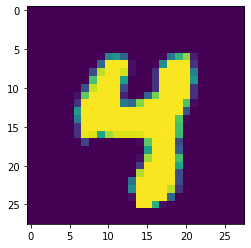

In [5]:
print('\nEvaluation:')

loss,accuracy = new_model.evaluate(xtest,ytest,verbose=1)

print('\n\nPrediction\n\n')

def get():
    num = input('type a num:')
    if num.isdigit():
        num = int(num)
        if 0<=num<10000:
            return num
        else:
            print('out of range')
    else:
        print('Try again')

def pred(model,img,labels):
    
    prediction = model.predict(np.array([img]))
    index=np.argmax(prediction)
    return labels[index]

num =get()
img=xtest[num]

print('\npredicted label:',pred(new_model,img,labels))
print('\nThe actual img:')
plt.imshow(img)
plt.show()


